# Install pyrecdp from github

In [3]:
!pip install 'git+https://github.com/intel/e2eAIOK.git#egg=pyrecdp&subdirectory=RecDP'

# Install jdk for pyspark running

In [ ]:
!DEBIAN_FRONTEND=noninteractive apt-get install -y openjdk-8-jre

# Prepare test data

In [5]:
%mkdir -p /content/test_data
%cd /content/test_data
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
!wget https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/tiny_c4_sample.jsonl

/content/test_data
--2023-10-18 09:32:54--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5799643 (5.5M) [text/plain]
Saving to: ‘arxiv_sample_100.jsonl’

arxiv_sample_100.js 100%[===================>]   5.53M  --.-KB/s    in 0.03s   

2023-10-18 09:32:55 (159 MB/s) - ‘arxiv_sample_100.jsonl’ saved [5799643/5799643]

--2023-10-18 09:32:55--  https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/github_sample_50.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conn

# Import quality classifier function

In [8]:
from pyrecdp.primitives.llmutils import quality_classifier_spark, quality_classifier
from pyrecdp.core import SparkDataProcessor

JAVA_HOME is not set, use default value of /usr/lib/jvm/java-8-openjdk-amd64/


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

# Specify variables

In [6]:
arxiv_data_file = '/content/test_data/arxiv_sample_100.jsonl'
github_data_file = '/content/test_data/github_sample_50.jsonl'
c4_data_file = '/content/test_data/tiny_c4_sample.jsonl'
arxiv_save_path = '/content/test_data/output/quality_classifier_arxiv'
github_save_path = '/content/test_data/output/quality_classifier_github'
c4_save_path = '/content/test_data/output/quality_classifier_c4'

# Load data

In [9]:
rdp = SparkDataProcessor()
spark = rdp.spark
arxiv_spark_df = spark.read.json(arxiv_data_file)
github_spark_df = spark.read.json(github_data_file)
c4_spark_df = spark.read.json(c4_data_file)
arxiv_spark_df.show()
github_spark_df.show()
c4_spark_df.show()

Will assign 1 cores and 10386 M memory for spark
per core memory size is 10.143 GB and shuffle_disk maximum capacity is 8589934592.000 GB
+--------------------+--------------------+
|                meta|                text|
+--------------------+--------------------+
|{2203.15369, en, ...|\section{Introduc...|
|{math/9807097, en...|\section{Introduc...|
|{2008.06948, en, ...|\section{Introduc...|
|{cond-mat/9807071...|\section{Introduc...|
|{2210.10650, en, ...|\section{\label{s...|
|{astro-ph/9807119...|\section{Introduc...|
|{2111.03152, en, ...|\section{Introduc...|
|{1606.04992, en, ...|\n\n\section{Intr...|
|{1608.03404, en, ...|\section{introduc...|
|{1904.10101, en, ...|\section{Introduc...|
|{cond-mat/9807275...|\section{Introduc...|
|{2109.05334, en, ...|\section{Introduc...|
|{1512.06966, en, ...|\section{Introduc...|
|{2112.04926, en, ...|\section{Introduc...|
|{2202.01000, en, ...|\section{Introduc...|
|{2209.13421, en, ...|\section{Introduc...|
|{1103.5603, en, 2...|\sec

# Process the 'text' column and generate doc score which will determine whether the row kept or not(spark dataframe interface)

In [10]:
arxiv_quality_classifier_df = quality_classifier_spark(arxiv_spark_df)
github_quality_classifier_df = quality_classifier_spark(github_spark_df)
c4_quality_classifier_df = quality_classifier_spark(c4_spark_df)
arxiv_quality_classifier_df.show()
github_quality_classifier_df.show()
c4_quality_classifier_df.show()

2023-10-18 09:43:22.259 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...


model_name is gpt3


2023-10-18 09:43:37.375 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...
2023-10-18 09:43:39.806 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...


model_name is gpt3
real_model_path is /root/.cache/recdp/models/gpt3_quality_model


2023-10-18 09:43:42.215 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...
2023-10-18 09:43:42.965 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:prepare_model:122 - Preparing scorer model in [/root/.cache/recdp/models/gpt3_quality_model]...


model_name is gpt3
real_model_path is /root/.cache/recdp/models/gpt3_quality_model


2023-10-18 09:43:45.020 | INFO     | pyrecdp.primitives.operations.text_qualityscorer:predict:252 - Start scoring dataset...


+--------------------+--------------------+--------------------+-----------+
|                meta|                text|           doc_score|should_keep|
+--------------------+--------------------+--------------------+-----------+
|{2203.15369, en, ...|\section{Introduc...|  0.9999999999996102|          1|
|{math/9807097, en...|\section{Introduc...|                 1.0|          1|
|{2008.06948, en, ...|\section{Introduc...|  0.9015197498942397|          1|
|{cond-mat/9807071...|\section{Introduc...|    0.99971976667992|          1|
|{2210.10650, en, ...|\section{\label{s...|                 1.0|          1|
|{astro-ph/9807119...|\section{Introduc...|0.001319136449002...|          0|
|{2111.03152, en, ...|\section{Introduc...|                 0.0|          0|
|{1606.04992, en, ...|\n\n\section{Intr...|                 1.0|          1|
|{1608.03404, en, ...|\section{introduc...|                 1.0|          1|
|{1904.10101, en, ...|\section{Introduc...|  0.9999979720467516|          1|

In [14]:
arxiv_quality_classifier_pd = arxiv_quality_classifier_df.toPandas()
github_quality_classifier_pd = github_quality_classifier_df.toPandas()
c4_quality_classifier_pd = c4_quality_classifier_df.toPandas()

In [130]:
from pandas import DataFrame
score_df = DataFrame(dict(arxiv_quality_score = arxiv_quality_classifier_pd["doc_score"].head(50).sort_values(ascending=True).reset_index(drop=True),
               github_quality_score = github_quality_classifier_pd["doc_score"].head(50).sort_values(ascending=True).reset_index(drop=True),
               c4_quality_score = c4_quality_classifier_pd["doc_score"].head(50).sort_values(ascending=True).reset_index(drop=True)))

# Display the quality score of different datasets

<Axes: >

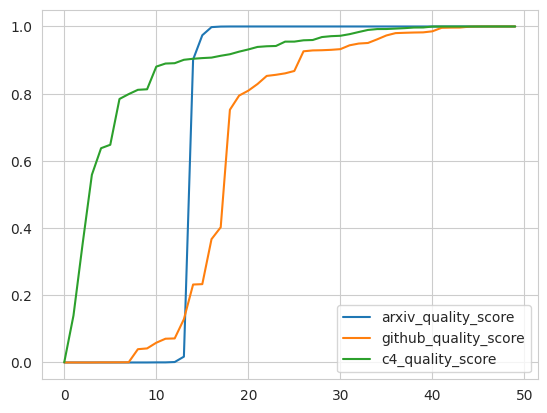

In [131]:
score_df.plot(y=["arxiv_quality_score", "github_quality_score", "c4_quality_score"], kind="line")